In [492]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
from scipy.optimize import brentq as br

In [493]:
data=pd.read_excel('oil3.xlsx')
kij=pd.read_excel('BIPs.xlsx')
Pg=pd.read_excel('pressures.xlsx')

In [494]:
T=data['T'][0] #reservoir temperature
R=8.314472*10**(-5) #m3*bar/mol*K
Tc=np.array(data['Tc'])
Pc=np.array(data['Pc'])
w=np.array(data['w'])
z=np.array(data['z'])
P=np.array(Pg['P'])
aL=pd.DataFrame(np.zeros((len(Tc),len(Tc))))
aV=pd.DataFrame(np.zeros((len(Tc),len(Tc))))
aLsc=pd.DataFrame(np.zeros((len(Tc),len(Tc))))
aVsc=pd.DataFrame(np.zeros((len(Tc),len(Tc))))

In [495]:
data

,z,Tc,Pc,w,P,T,A1,0.533272,Unnamed: 8,−1247.4,...,Unnamed: 12,5.71419,Unnamed: 14,3.83354,Unnamed: 16,Unnamed: 17,Unnamed: 18,θ,Unnamed: 20,Unnamed: 21
0,0.0016,32.980,12.93,-0.217000,100.0,377.55,A2,0.000191017,NaN,0.792,...,NaN,2.715790,NaN,1.19629,NaN,NaN,NaN,0.771819,15.687500,NaN
1,0.0091,304.200,72.80,0.225000,NaN,NaN,A3,7.79681e-08,NaN,1971,...,NaN,0.286590,NaN,34.8888,NaN,NaN,NaN,14.700000,13.472100,NaN
2,0.3647,190.560,45.99,0.011000,NaN,NaN,A4,-2.8437e-11,NaN,27000,...,NaN,39.854400,NaN,36.1952,NaN,NaN,NaN,5.927140,0.435770,NaN
3,0.0967,282.340,50.41,0.087000,NaN,NaN,A5,9594679999999999883717115904,NaN,707.4,...,NaN,0.122488,NaN,104.193,NaN,NaN,NaN,6.096480,-1.062843,NaN
4,0.0695,364.900,46.00,0.142000,NaN,NaN,A6,NaN,NaN,NaN,...,NaN,24.752200,NaN,α,NaN,NaN,NaN,1.288620,-1.492099,NaN
5,0.0144,407.850,36.40,0.186000,NaN,NaN,Tbc,992.353,NaN,NaN,...,NaN,35.315500,NaN,0.228181,NaN,NaN,NaN,0.169347,0.712314,ω
6,0.0393,425.120,37.96,0.200000,NaN,NaN,TC,1285.73,to,714.296,...,NaN,218.000000,NaN,211.207,NaN,NaN,NaN,15.251800,NaN,NaN
7,0.0144,460.390,33.81,0.229000,NaN,NaN,NaN,Rankine,NaN,Kelvin,...,NaN,5.384495,NaN,psia,to,14.56,bar,NaN,NaN,NaN
8,0.0141,469.700,33.70,0.252000,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,992.352895,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,0.3762,714.296,14.56,0.712314,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [496]:
kij

,H2,CO2,C1,C2,C3,IC4,C4,IC5,C5,C6+,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16
0,0,0,0.000000,0.000000,0.000000,0,0,0,0,0.000,H2,NaN,NaN,NaN,0.134090,NaN,NaN
1,0,0,0.000000,0.000000,0.000000,0,0,0,0,0.000,CO2,NaN,NaN,NaN,2.285430,NaN,c1c6
2,0,0,0.000000,-0.121232,-0.105856,0,0,0,0,0.135,C1,NaN,NaN,NaN,7.614550,NaN,0.00776585
3,0,0,-0.121232,0.000000,0.000000,0,0,0,0,0.000,C2,NaN,NaN,NaN,10.465650,NaN,-0.121232
4,0,0,-0.105856,0.000000,0.000000,0,0,0,0,0.000,C3,NaN,NaN,NaN,5.235100,NaN,-0.105856
5,0,0,0.000000,0.000000,0.000000,0,0,0,0,0.000,IC4,NaN,NaN,w,0.712314,NaN,NaN
6,0,0,0.000000,0.000000,0.000000,0,0,0,0,0.000,C4,NaN,NaN,NaN,0.087000,NaN,NaN
7,0,0,0.000000,0.000000,0.000000,0,0,0,0,0.000,IC5,NaN,NaN,NaN,0.142000,NaN,NaN
8,0,0,0.000000,0.000000,0.000000,0,0,0,0,0.000,C5,NaN,NaN,NaN,NaN,NaN,NaN
9,0,0,0.135000,0.000000,0.000000,0,0,0,0,0.000,C6+,NaN,NaN,NaN,NaN,NaN,NaN


In [497]:
#Import shift volume parameters
s=[0,0,-0.154,-0.1002,-0.08501,-0.07935,-0.06413,-0.0435,-0.04183,0.3]

In [498]:
#reservoir conditions
VLcor=[]
VVcor=[]
sumcor=[]
vvcor=[]
Gp=[]
Gpcor=[]
VL=[]
VV=[]
Vact=0
Lact=0
rb=0
ZLr=[]
ZVr=[]
Vr=[]
Lr=[]
Pb=195.48644047605288 #from bubble point code
for r in range (0,len(P)):
    if P[r]>Pb:
        ZL=[]
        a=[]
        b=[]
        α=[]
        cor1=[]
        for i in range (0,len(w)):
            b=np.append(b,(z[i]*0.0778*R*Tc[i])/Pc[i])
            cor1=np.append(cor1,s[i]*b[i])
            if w[i]<=0.491:
                m=0.37464+1.54226*w[i]-0.26992*w[i]*w[i]
                α=np.append(α,(1/Pc[i])*0.45724*(R*R)*(Tc[i]*Tc[i])*(1+m*(1-math.sqrt(T/Tc[i])))**2)
            else:
                m=0.379642+1.48503*w[i]-0.164423*w[i]*w[i]+0.016666*w[i]*w[i]*w[i]
                α=np.append(α,(1/Pc[i])*0.45724*(R*R)*(Tc[i]*Tc[i])*(1+m*(1-math.sqrt(T/Tc[i])))**2)
        for i in range (0,len(Tc)): 
            for j in range(0,len(Tc)):
                a=np.append(a,z[i]*z[j]*(1-kij.iat[i,j])*math.sqrt(α[i]*α[j]))
        sumcor=np.append(sumcor,sum(cor1))
        vvcor=np.append(vvcor,0)
        am=np.sum(a)
        bm=np.sum(b)
        A=(am*P[r])/(R*R*T*T)
        B=(bm*P[r])/(R*T)
        Zro=np.array([1,B-1,A-2*B-3*(B*B),(B**3)+(B**2)-A*B])
        Zro=np.roots(Zro)
        Real=[]
        for i in range(len(Zro)):
            if abs(Zro[i].imag)<10**(-5):
                Real=np.append(Real, np.real(Zro[i]))
        ZL=min(Real)
        ZV=0
        V=0
        rb=0
        L=1
    else:  

        rb=rb+1
        SSF=5
        n=0
        while SSF>10**(-15):
            if n<=0:
                if rb<=1:
                    Vo=0
                    K=[]
                    for i in range (0,len(Tc)):
                        K=np.append(K,(Pc[i]/P[r])*math.exp(5.37*(1+w[i])*(1-Tc[i]/T))) #estimating K values from Wilson's Correlation
                    def f(Vo):
                        return sum(z*(K-1)/(1+Vo*(K-1)))
                    V=br(f,0,1)
                    Vact=V*Lr[r-1]
                    Lact=Lr[r-1]*(1-V)
                    x=[]
                    y=[]
                    for i in range (0,len(Tc)):
                        x=np.append(x,z[i]/(1+V*(K[i]-1)))
                        y=np.append(y,z[i]*K[i]/(1+V*(K[i]-1)))
                else:
                    z=x
                    Vo=0
                    K=[]
                    for i in range (0,len(Tc)):
                        K=np.append(K,(Pc[i]/P[r])*math.exp(5.37*(1+w[i])*(1-Tc[i]/T)))
                    def f(Vo):
                        return sum(z*(K-1)/(Vo*(K-1)+1))
                    V=br(f,0,1)
                    Vact=V*Lr[r-1]
                    Lact=Lr[r-1]*(1-V)
                    x=[]
                    y=[]
                    for i in range (0,len(Tc)):
                        x=np.append(x,z[i]/(1+V*(K[i]-1)))
                        y=np.append(y,z[i]*K[i]/(1+V*(K[i]-1)))
            else:
                if rb<=1:
                    Vo=Vact
                    K=[]
                    for i in range (0,len(Tc)):
                        K=np.append(K,φLi[i]/φVi[i])
                    def f(Vo):
                        return sum(z*(K-1)/(1+Vo*(K-1)))
                    V=br(f,0,1)
                    Vact=V*Lr[r-1]
                    Lact=Lr[r-1]*(1-V)
                    x=[]
                    y=[]
                    for i in range (0,len(Tc)):
                        x=np.append(x,z[i]/(1+V*(K[i]-1)))
                        y=np.append(y,z[i]*K[i]/(1+V*(K[i]-1)))
                else :
                    Vo=Vact
                    K=[]
                    for i in range (0,len(Tc)):
                        K=np.append(K,φLi[i]/φVi[i])
                    def f(Vo):
                        return sum(z*(K-1)/(Vo*(K-1)+1))
                    V=br(f,0,1)
                    Vact=V*Lr[r-1]
                    Lact=Lr[r-1]*(1-V)
                    x=[]
                    y=[]
                    for i in range (0,len(Tc)):
                        x=np.append(x,z[i]/(1+V*(K[i]-1)))
                        y=np.append(y,z[i]*K[i]/(1+V*(K[i]-1)))
            α=[]
            bLi=[]
            bL=[]
            bVi=[]
            bV=[]
            cor2=[]
            cor3=[]
            for i in range (0,len(Tc)):  
                bLi=np.append(bLi,(0.0778*R*Tc[i])/Pc[i])
                bVi=np.append(bVi,(0.0778*R*Tc[i])/Pc[i])
                bL=np.append(bL,x[i]*bLi[i])
                bV=np.append(bV,y[i]*bVi[i])
                cor2=np.append(cor2,s[i]*bLi[i]*x[i])
                cor3=np.append(cor3,s[i]*bVi[i]*y[i])
                if w[i]<=0.491:
                    m=0.37464+1.54226*w[i]-0.26992*w[i]*w[i]
                    α=np.append(α,(1/Pc[i])*0.45724*(R*R)*(Tc[i]*Tc[i])*(1+m*(1-math.sqrt(T/Tc[i])))**2)
                else:
                    m=0.379642+1.48503*w[i]-0.164423*w[i]*w[i]+0.016666*w[i]*w[i]*w[i]
                    α=np.append(α,(1/Pc[i])*0.45724*(R*R)*(Tc[i]*Tc[i])*(1+m*(1-math.sqrt(T/Tc[i])))**2)
            for i in range (0,len(Tc)): 
                for j in range(0,len(Tc)):
                    aL.iat[i,j]=x[i]*x[j]*(1-kij.iat[i,j])*math.sqrt(α[i]*α[j])
                    aV.iat[i,j]=y[i]*y[j]*(1-kij.iat[i,j])*math.sqrt(α[i]*α[j])
            amL=aL.sum().sum()
            amV=aV.sum().sum()
            bmL=np.sum(bL)
            bmV=np.sum(bV)
            AL =(amL*P[r])/(R*T)**2
            AV=(amV*P[r])/(R*T)**2
            BL=(bmL*P[r])/(R*T)
            BV=(bmV*P[r])/(R*T)
            ZroL=np.array([1,BL-1,AL-2*BL-3*(BL*BL),(BL**3)+(BL**2)-AL*BL])
            ZroL=np.roots(ZroL)
            RealL=[]
            for i in range(len(ZroL)):
                    if abs(ZroL[i].imag)<10**(-5):
                        RealL=np.append(RealL, np.real(ZroL[i]))
            ZL=min(RealL[RealL>0])          
            ZroV=np.array([1,BV-1,AV-2*BV-3*(BV*BV),(BV**3)+(BV**2)-AV*BV])
            ZroV=np.roots(ZroV)
            RealV=[]
            for i in range(len(ZroV)):
                    if abs(ZroV[i].imag)<10**(-5):
                        RealV=np.append(RealV, np.real(ZroV[i]))
            ZV=max(RealV[RealV>0])
            lnφLi=[]
            φLi=[]
            fLi=[]
            lnφVi=[]
            φVi=[]
            fVi=[]
            SF=[]
            g1V=[]
            g1L=[]
            for i in range (0,len(Tc)):
                gL=[]
                gV=[]
                for j in range (0,len(Tc)):
                    gL=np.append(gL,x[j]*math.sqrt(α[j])*(1-kij.iat[i,j]))
                    gV=np.append(gV,y[j]*math.sqrt(α[j])*(1-kij.iat[i,j]))
                g1L=np.append(g1L,sum(gL))
                g1V=np.append(g1V,sum(gV))
                lnφL=-math.log(ZL-BL)+(ZL-1)*(bLi[i]/bmL)-(AL/(BL*(2**1.5)))*((2*math.sqrt(α[i])*g1L[i]/amL)-(bLi[i]/bmL))*math.log((ZL+BL*(2**0.5+1))/(ZL-BL*(2**0.5-1)))
                lnφV=-math.log(ZV-BV)+(ZV-1)*(bVi[i]/bmV)-(AV/(BV*(2**1.5)))*((2*math.sqrt(α[i])*g1V[i]/amV)-(bVi[i]/bmV))*math.log((ZV+BV*(2**0.5+1))/(ZV-BV*(2**0.5-1)))
                lnφLi=np.append(lnφLi,lnφL)
                lnφVi=np.append(lnφVi,lnφV)
                φLi=np.append(φLi,math.exp(lnφLi[i]))
                φVi=np.append(φVi,math.exp(lnφVi[i]))
                fLi=np.append(fLi,φLi[i]*P[r]*x[i])   
                fVi=np.append(fVi,φVi[i]*P[r]*y[i])  
                SF=np.append(SF,(1-(fLi[i]/fVi[i]))**2)
            SSF=sum(SF)
            n=n+1    
        sumcor=np.append(sumcor,sum(cor2))
        vvcor=np.append(vvcor,sum(cor3))             
    if rb>0:
        Lr=np.append(Lr,Lact)
        Vr=np.append(Vr,Vact)
    else:
        Lr=np.append(Lr,1)
        Vr=np.append(Vr,0)
    Gp=np.append(Gp,0.024004712*Vr[r])    
    Gpcor=np.append(Gpcor,Gp[r]-Vr[r]*vvcor[r])
    VL=np.append(VL,Lr[r]*ZL*R*T/P[r])
    VV=np.append(VV,Vr[r]*ZV*R*T/P[r])
    VLcor=np.append(VLcor,VL[r]-Lr[r]*sumcor[r])
    VVcor=np.append(VVcor,VV[r]-Vr[r]*vvcor[r])

In [499]:
#standard conditions(residual oil volume)
T=288.15
αsc=[]
bLisc=[]
bLsc=[]
cor2sc=[]
for i in range (0,len(Tc)):  
    bLisc=np.append(bLisc,(0.0778*R*Tc[i])/Pc[i])
    bLsc=np.append(bLsc,x[i]*bLi[i])
    cor2sc=np.append(cor2sc,s[i]*bLisc[i]*x[i])
    if w[i]<=0.491:
        m=0.37464+1.54226*w[i]-0.26992*w[i]*w[i]
        αsc=np.append(αsc,(1/Pc[i])*0.45724*(R*R)*(Tc[i]*Tc[i])*(1+m*(1-math.sqrt(T/Tc[i])))**2)
    else:
        m=0.379642+1.48503*w[i]-0.164423*w[i]*w[i]+0.016666*w[i]*w[i]*w[i]
        αsc=np.append(αsc,(1/Pc[i])*0.45724*(R*R)*(Tc[i]*Tc[i])*(1+m*(1-math.sqrt(T/Tc[i])))**2)
for i in range (0,len(Tc)): 
    for j in range(0,len(Tc)):
        aLsc.iat[i,j]=x[i]*x[j]*(1-kij.iat[i,j])*math.sqrt(αsc[i]*αsc[j])
amLsc=aLsc.sum().sum()
bmLsc=np.sum(bLsc)
ALsc =(amLsc*P[-1])/(R*T)**2
BLsc=(bmLsc*P[-1])/(R*T)
ZroLsc=np.array([1,BLsc-1,ALsc-2*BLsc-3*(BLsc*BLsc),(BLsc**3)+(BLsc**2)-ALsc*BLsc])
ZroLsc=np.roots(ZroLsc)
RealLsc=[]
for i in range(len(ZroLsc)):
    if abs(ZroLsc[i].imag)<10**(-5):
        RealLsc=np.append(RealLsc, np.real(ZroLsc[i]))
ZLsc=min(RealLsc[RealLsc>0]) 
Vsc=Lr[-1]*ZLsc*R*288.15/P[-1] #residual oil volume
Vsccor=Vsc-Lr[-1]*sumcor[-1] #residual oil volume with volume translation

In [500]:
#Calculation of Bo
Bo=VL/Vsc
Bocor=VLcor/Vsccor
Boexp=np.array([1.59,1.601,1.555,1.516,1.480,1.446,1.413,1.383,1.352,1.321,1.284,1.244,1.075])

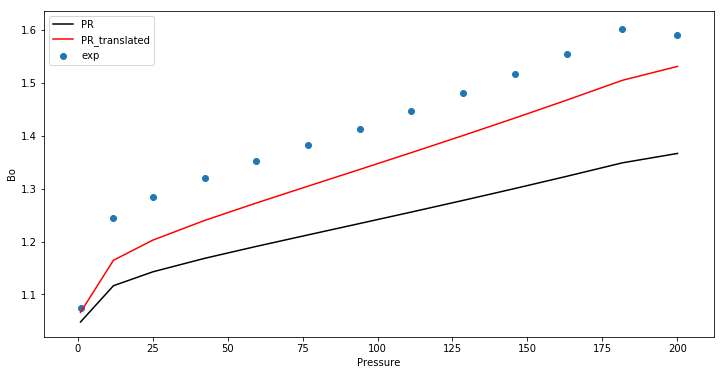

In [501]:
#plotting Bo vs P
plt.plot(P,Bo,color='black') #without volume translation
plt.plot(P,Bocor,color='red') #with volume translation
plt.scatter(P,Boexp)
plt.legend(['PR','PR_translated','exp'])
plt.xlabel('Pressure')
plt.ylabel('Bo')
fig = plt.gcf()
fig.set_size_inches(12,6)

In [502]:
print('Average absolute deviation from experimental data is up to',np.average(100*(np.abs(Bocor-Boexp)/Boexp)),'%')

Average absolute deviation from experimental data is up to 5.245021670735789 %


In [503]:
100*(Bo-Boexp)/Boexp
print('Average absolute deviation from experimental data is up to',np.average(100*(np.abs(Bo-Boexp)/Boexp)),'%')

Average absolute deviation from experimental data is up to 12.150151321999267 %


In [504]:
#Calculation of Rs in cubic meters of gas/cubic meters of residual oil
P_Rs=[]
Gpcum=np.cumsum(Gp)
Gpcorcum=np.cumsum(Gpcor)
Gptotal=sum(Gp)
Gpcortotal=sum(Gpcor)
Rs=(Gptotal-Gpcum)/(Vsc)
Rscor=(Gpcortotal-Gpcorcum)/(Vsccor)
Rs_exp=np.array([151.4,151.4,135.26,121.26,108.5,96.44,84.92,73.75,62.76,51.77,39.53,27.83,0])

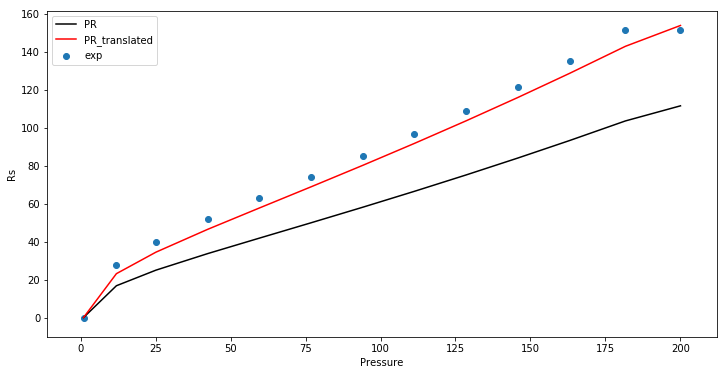

In [505]:
#plotting of Rs vs P
plt.plot(P,Rs,color='black')
plt.plot(P,Rscor,color='red')
plt.scatter(P,Rs_exp)
plt.legend(['PR','PR_translated','exp'])
plt.xlabel('Pressure')
plt.ylabel('Rs')
fig = plt.gcf()
fig.set_size_inches(12,6)


In [506]:
print('Average absolute deviation of PRfrom experimental data is up to',np.average(100*np.abs(Rs[0:len(Rs)-1]-Rs_exp[0:len(Rs_exp)-1])/Rs_exp[0:len(Rs_exp)-1]),'%')

Average absolute deviation of PRfrom experimental data is up to 32.55982794958981 %


In [507]:
print('Average absolute deviation of translated PR from experimental data is up to',np.average(100*np.abs(Rscor[0:len(Rscor)-1]-Rs_exp[0:len(Rs_exp)-1])/Rs_exp[0:len(Rs_exp)-1]),'%')

Average absolute deviation of translated PR from experimental data is up to 7.225454404517143 %
